In [5]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [23]:
def load_data(filename):
    """function to load data"""
    x = scipy.io.loadmat(filename)['PDmean'][30:90,:]*100
    return x

In [24]:
global T4_Arclight, T4_Gcamp #global varaiables to hold Arclight and Gcamp data

filename = 'data/T4c_ArcLight/ARCOri_Velocity_Mean.mat' 
T4_Arclight = load_data(filename)  #load Arclight data

filename = 'data/T4c_GCaMP/Ori_Mean_Velocity.mat'
T4_Gcamp = load_data(filename)  #load Gcamp data

In [61]:
def plot_data(data_list, dt=0.0769, fig_size=(14,14), speed=[15,30,60,120], title='', savefig=False, c=['k','r']):
    """Plots data for multiple datsets"""
    n_col = len(speed) #number of columns i.e. number of speed stimuli
    n_sti = data_list[0].shape[1] #number of orientations
    x_values = np.arange(data_list[0].shape[0]) * dt #changing x-axis to time. multiply with time step dt = 1/frequency
    f, ax = plt.subplots(int(n_sti/n_col), int(n_col), sharex=True, sharey= True, figsize=fig_size)
    c_count = 0 #color count for different dataset
    for data in data_list:
        count = 0 #count for stimuli
        for i in range(int(n_sti/n_col)):
            for j in range(n_col):
                ax[i, j].plot(x_values, data[:, count], color=c[c_count])
                #ax[i, j].plot(data[:, count], color=c[c_count])
                count = count + 1
        c_count += 1
    plt.suptitle(title, fontsize=15)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    if savefig:
        plt.savefig('figures/'+title+'.pdf',dpi=1000);
        
def plot_data_twinaxis(data_list, dt=0.0769, fig_size=(14,14), speed=[15,30,60,120], title='', savefig=False, c=['k','r']):
    """Plots data for multiple datsets"""
    n_col = len(speed) #number of columns i.e. number of speed stimuli
    n_sti = data_list[0].shape[1] #number of orientations
    x_values = np.arange(data_list[0].shape[0]) * dt #changing x-axis to time. multiply with time step dt = 1/frequency
    f, ax = plt.subplots(int(n_sti/n_col), int(n_col), sharex=True, sharey= True, figsize=fig_size)
    c_count = 0 #color count for different dataset
    for data in data_list:
        count = 0 #count for stimuli
        for i in range(int(n_sti/n_col)):
            for j in range(n_col):
                if c_count == 0:
                    ax[i, j].plot(x_values, data[:, count], color=c[c_count])
                else :
                    ax1 = ax[i,j].twinx()
                    ax1.plot(x_values, data[:, count], color=c[c_count])
                    #ax1.set_ylim(-20,250)
                #ax[i, j].plot(data[:, count], color=c[c_count])
                count = count + 1
        c_count += 1
    plt.suptitle(title, fontsize=15)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    if savefig:
        plt.savefig('figures/'+title+'.pdf',dpi=1000);

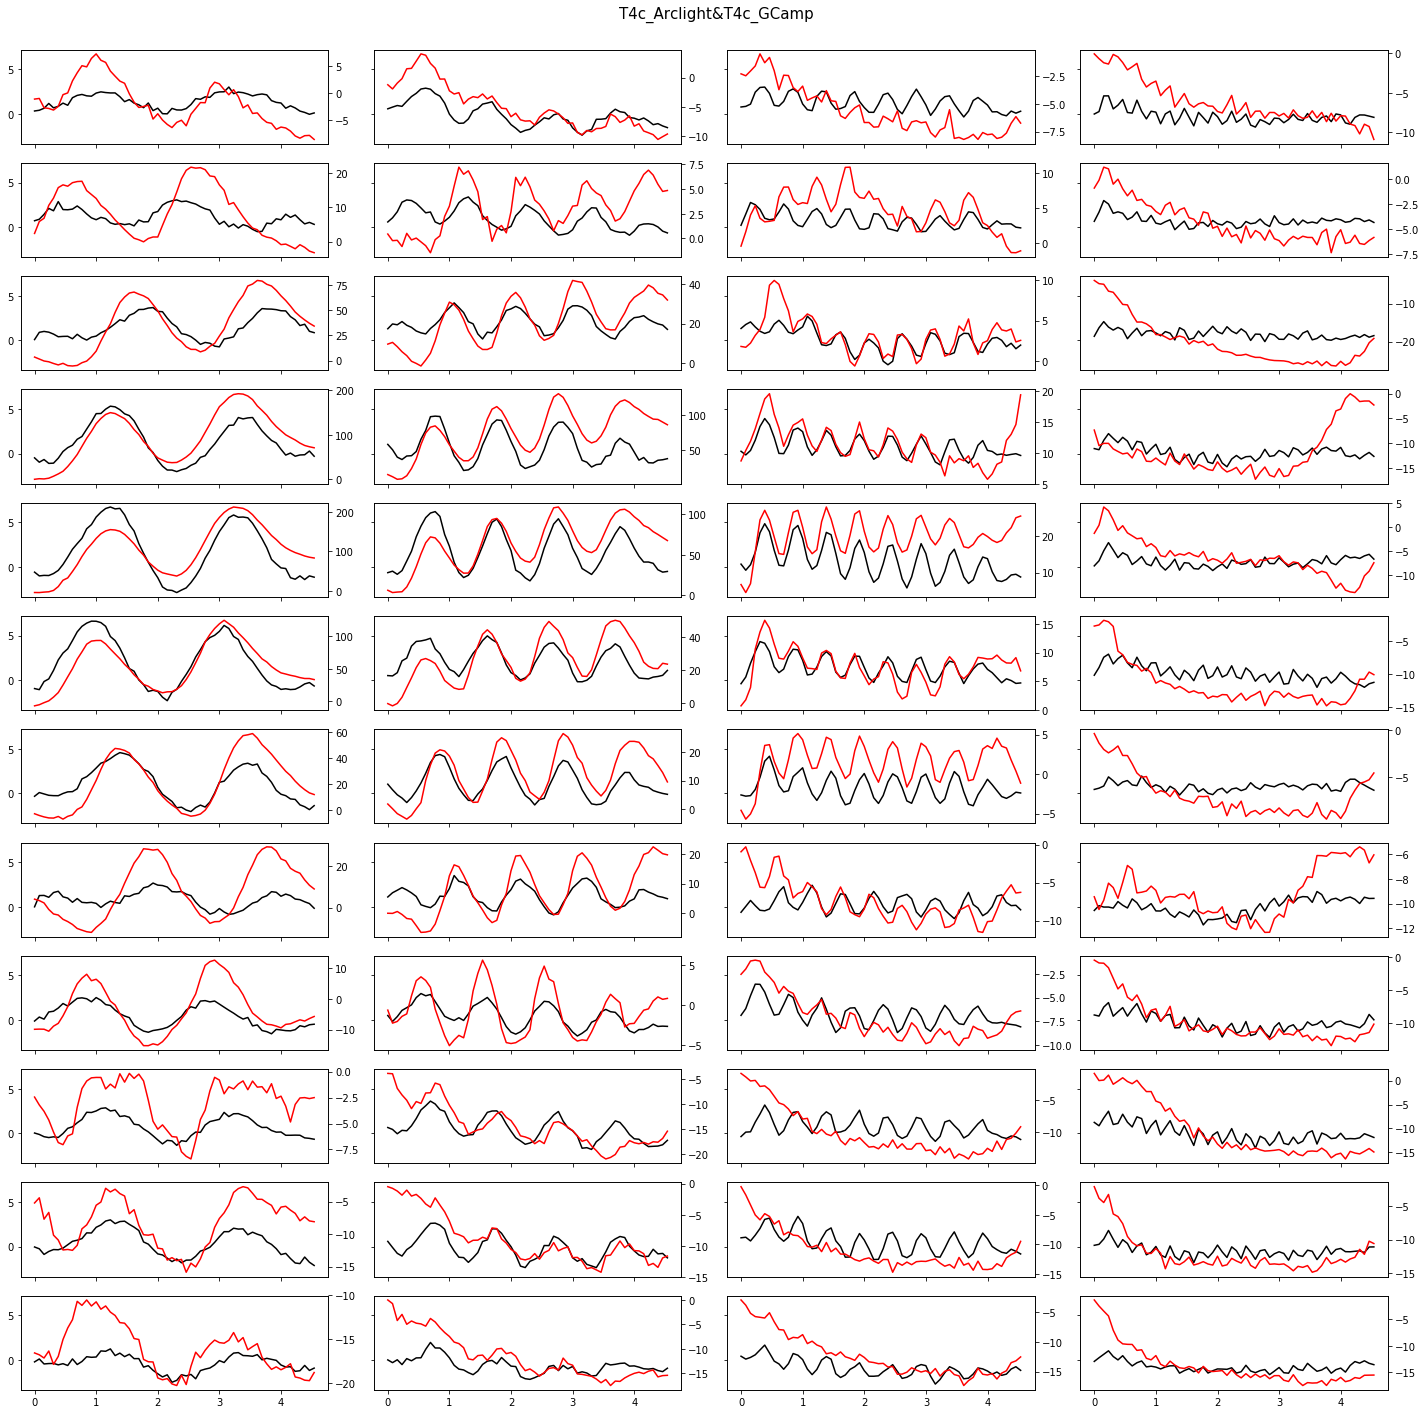

In [72]:
plot_data_twinaxis([T4_Arclight, T4_Gcamp],fig_size=(20,20),title='T4c_Arclight&T4c_GCamp',savefig=True)

In [73]:
T4_Arclight.shape, T4_Gcamp.shape

((60, 48), (60, 48))

In [74]:
gain_func = (T4_Gcamp.max(axis=0)/T4_Arclight.max(axis=0))

In [75]:
gain_func

array([ 2.43872501e+00,  1.41105144e+00, -1.70154818e-01, -4.24903526e-02,
        7.09075840e+00,  2.13617428e+00,  3.93751795e+00,  3.90569970e-01,
        2.15375961e+01,  9.95994655e+00,  3.66934228e+00, -1.87438411e+00,
        3.61431786e+01,  3.09579269e+01,  4.95592984e+00, -7.28984707e-03,
        3.16758337e+01,  1.75368789e+01,  5.79608534e+00,  1.56235294e+00,
        1.88467606e+01,  1.01122332e+01,  3.60923171e+00, -6.20631139e-01,
        1.27912234e+01,  6.04300578e+00,  1.23003976e+00, -1.66746508e-01,
        1.09710874e+01,  6.44833709e+00, -1.22254555e-01, -3.17235521e+00,
        5.01578912e+00,  1.89345174e+00, -2.58286795e-01, -2.53577011e-01,
       -5.81081137e-02, -1.08459666e+00, -2.90203404e-01,  6.13995318e-01,
       -9.03715338e-01, -1.86426233e-01, -8.07501200e-02, -1.19381100e+00,
       -8.57101194e+00, -1.76313486e-02, -1.76551326e+00, -1.28981911e+00])

In [76]:
T4Ca_model = T4_Arclight*gain_func

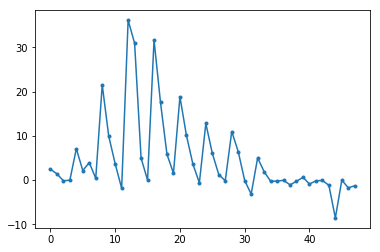

In [77]:
plt.plot(gain_func,marker='.');

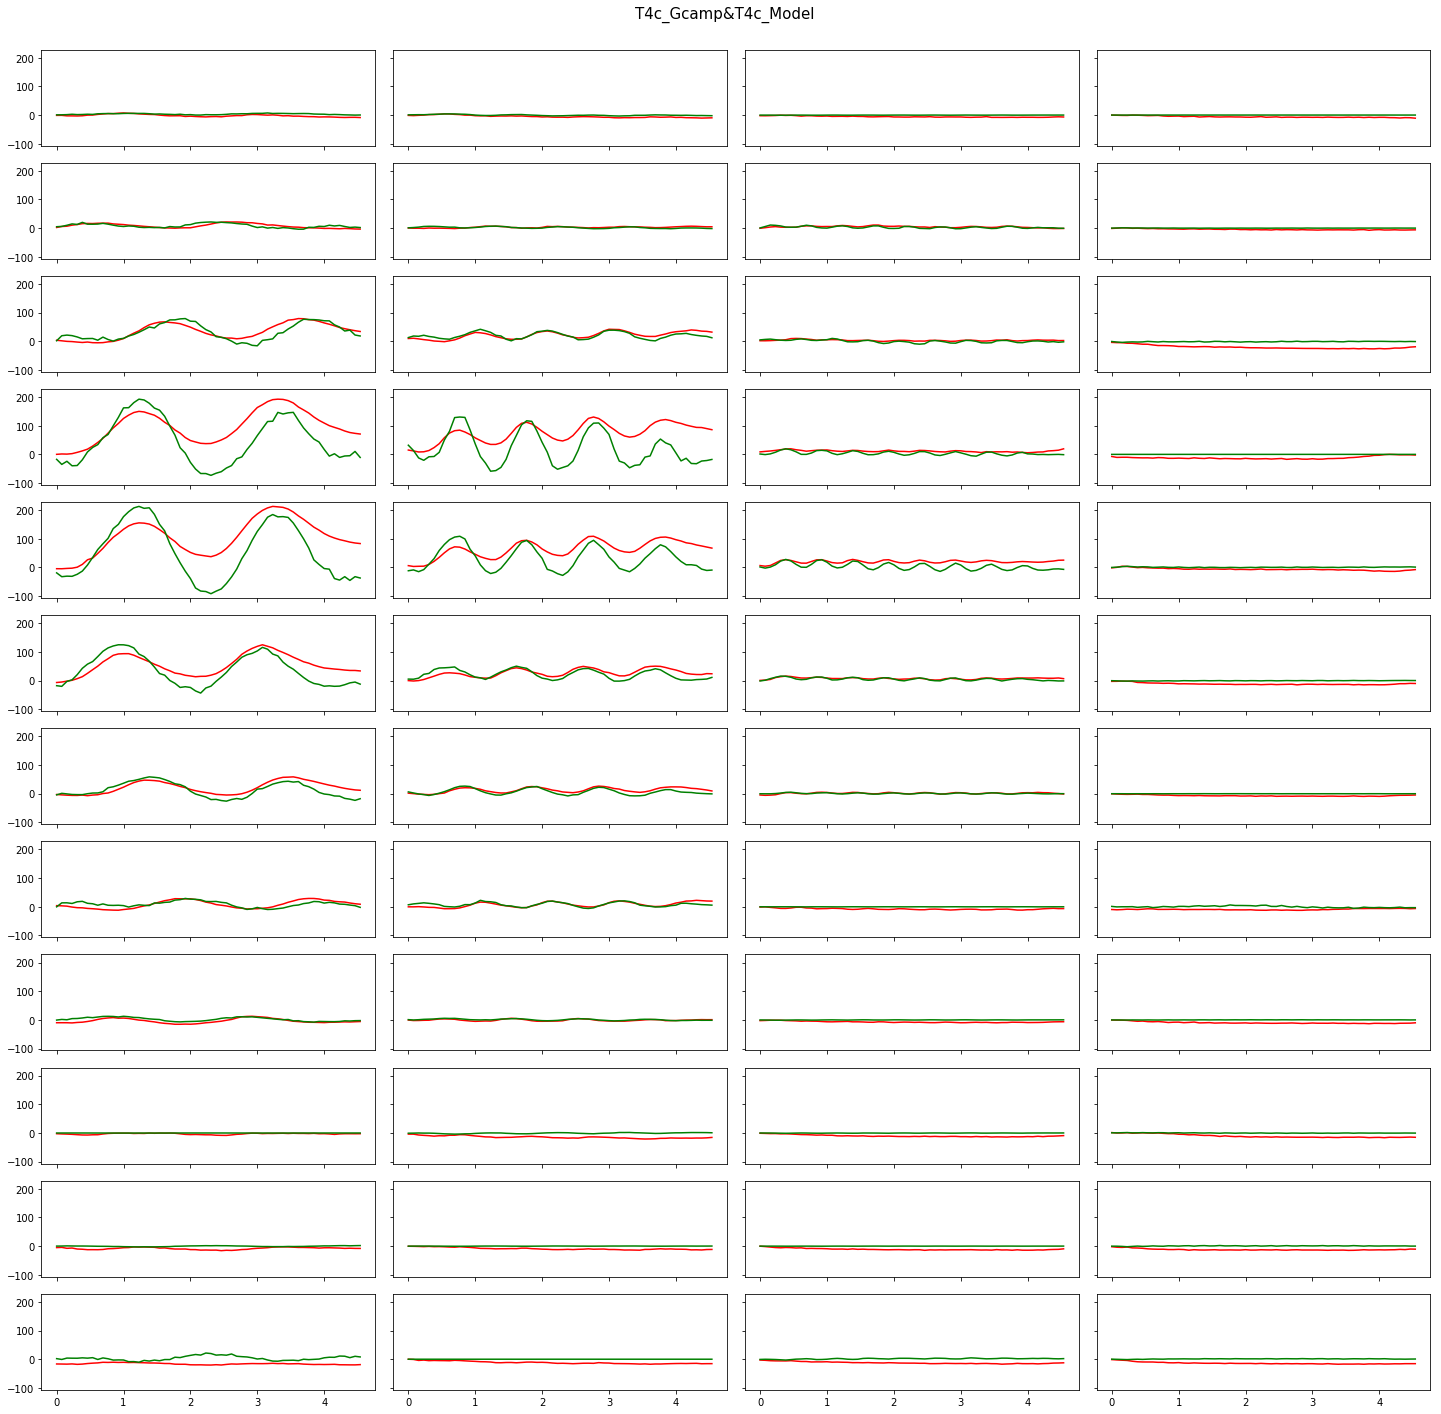

In [79]:
plot_data([T4_Gcamp, T4Ca_model],c=['r','g'],fig_size=(20,20),title='T4c_Gcamp&T4c_Model',savefig=True)

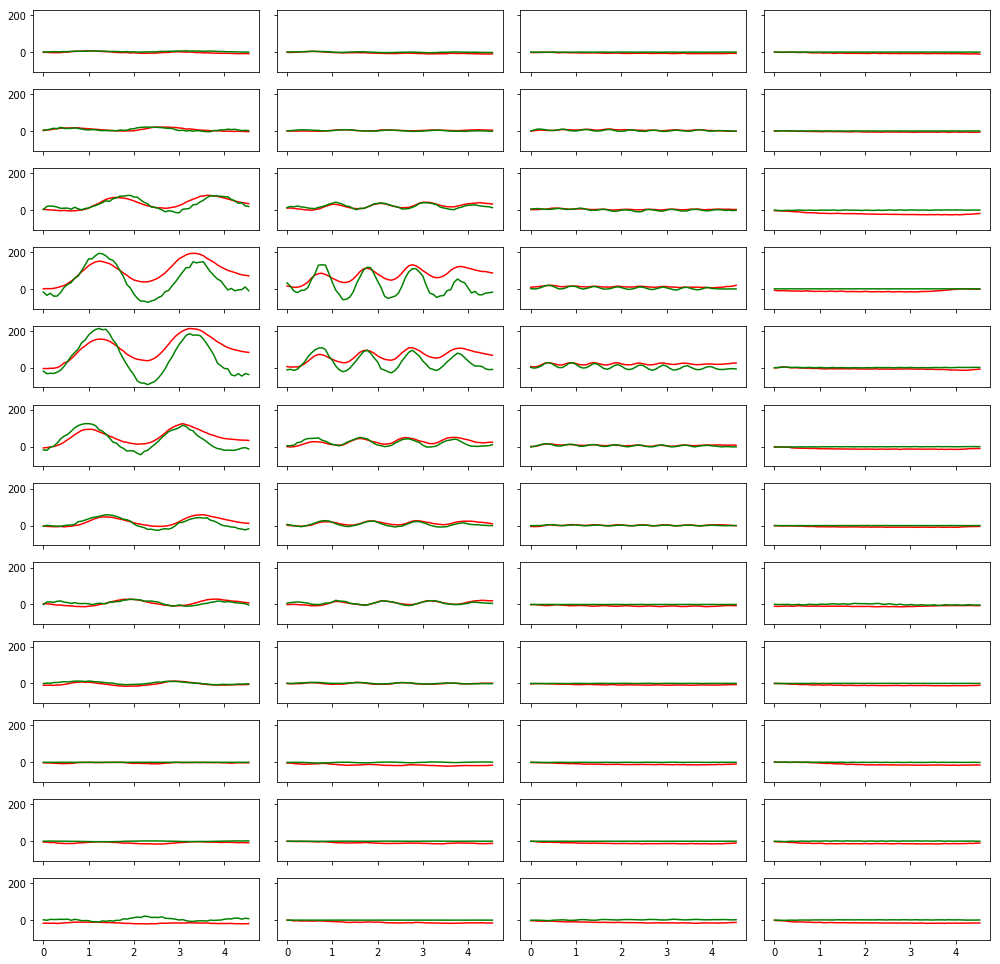

In [68]:
plot_data([T4_Gcamp, T4Ca_model],c=['r','g'])

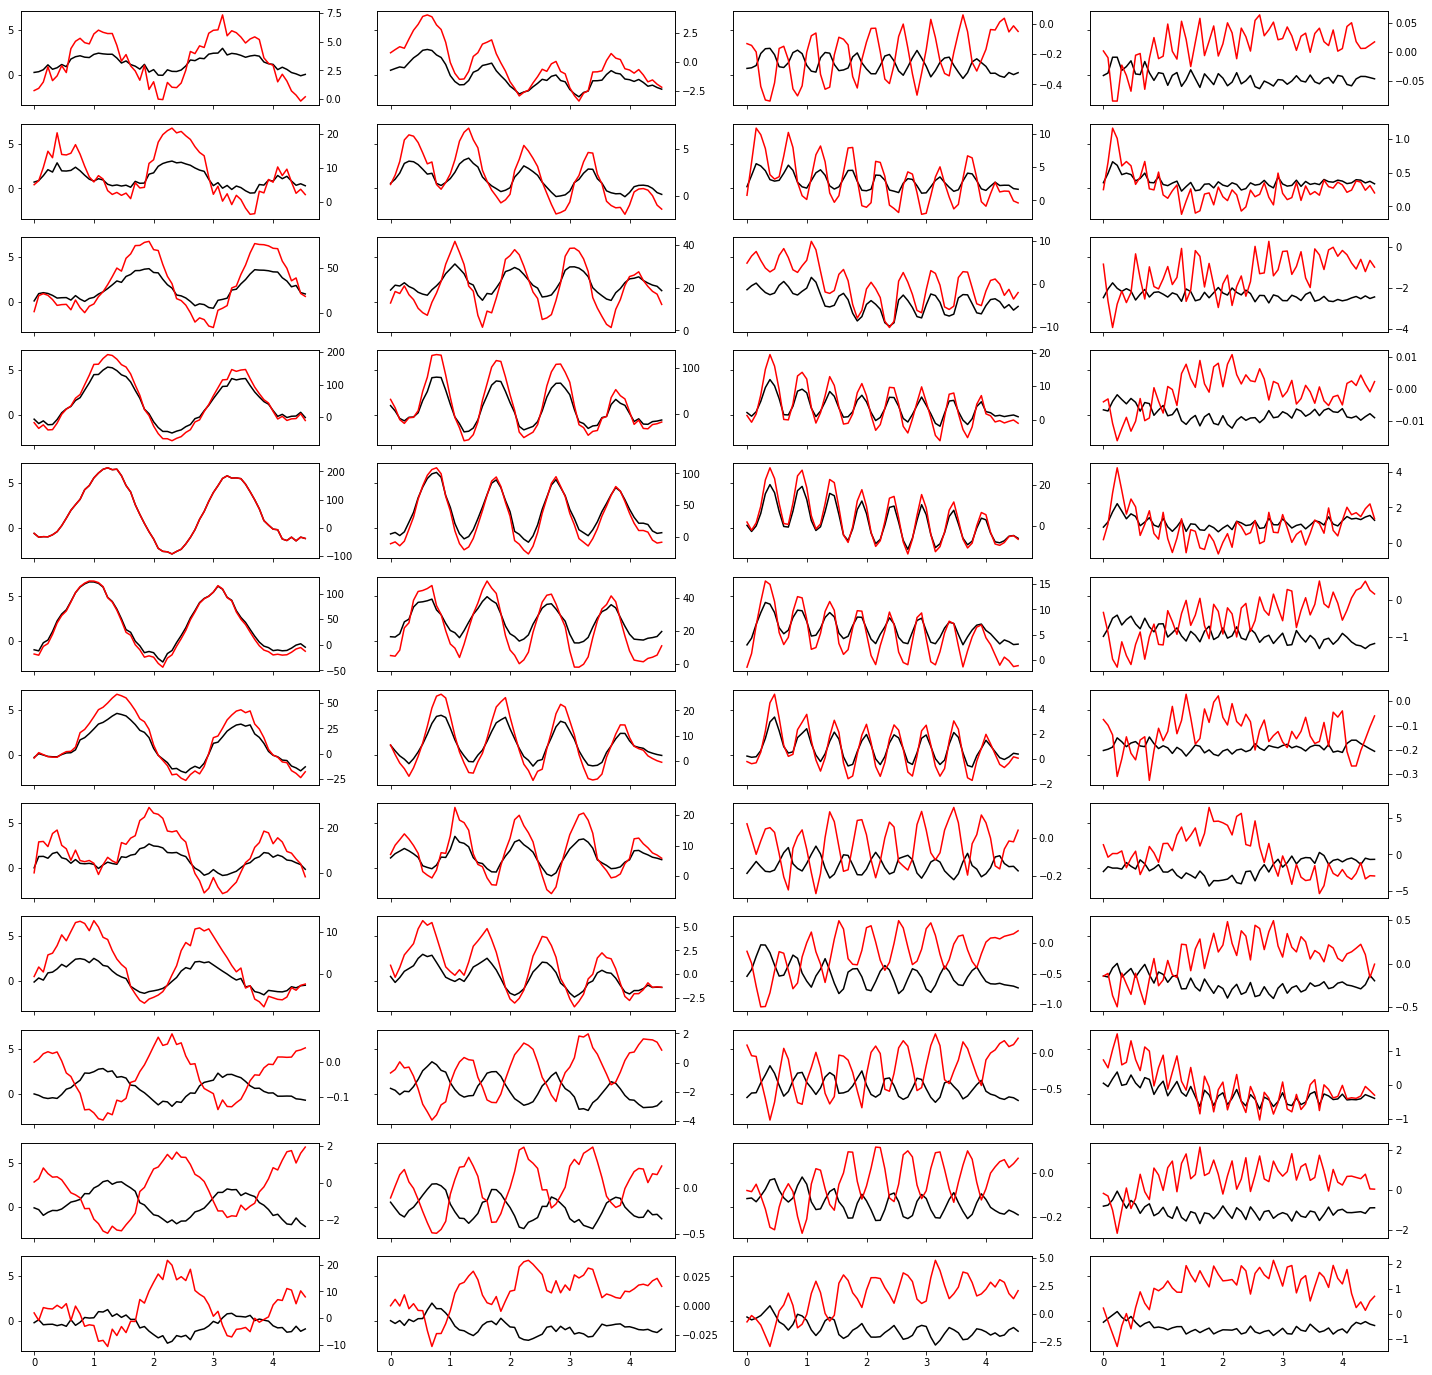

In [71]:
plot_data_twinaxis([T4_Arclight, T4Ca_model],fig_size=(20,20))

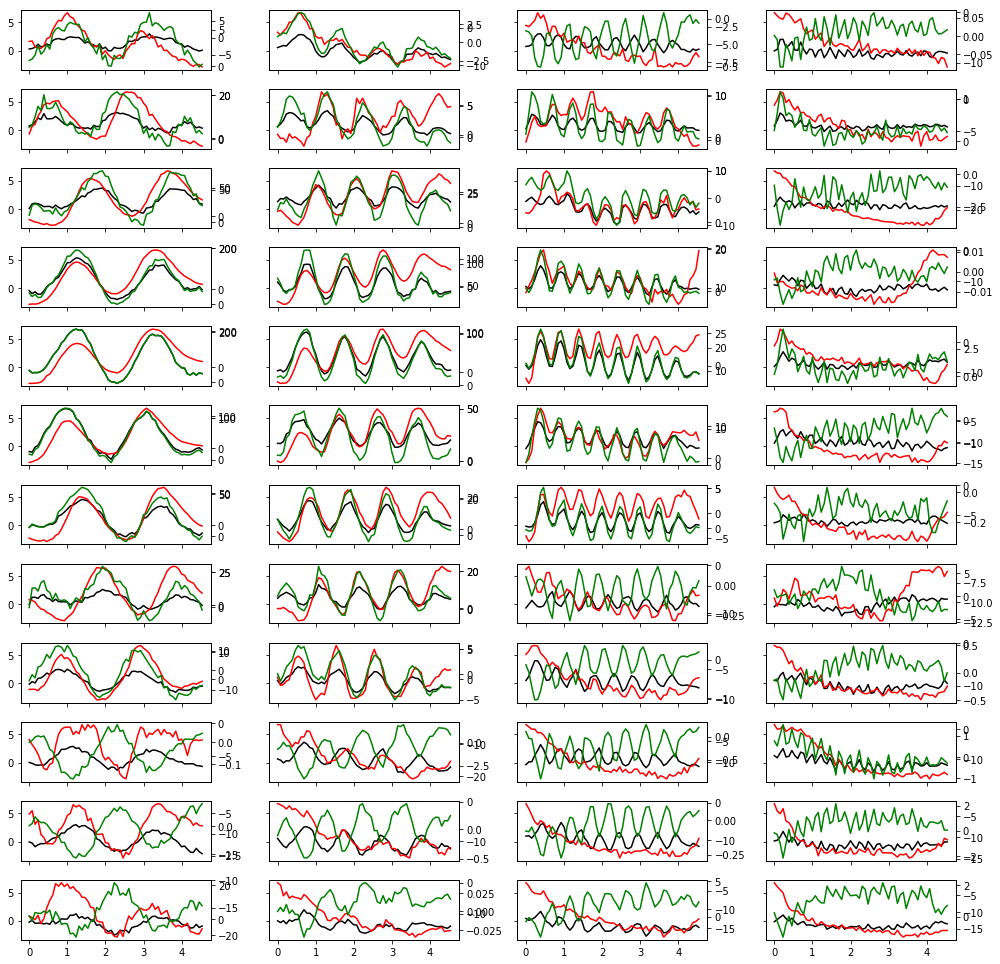

In [70]:
plot_data_twinaxis([T4_Arclight,T4_Gcamp, T4Ca_model],c=['k','r','g'])